In [23]:
import pandas as pd
censo_train = pd.read_csv('../data/censo_train.csv', index_col = 'key_value')
y_train = pd.read_csv('../data/y_train.csv', index_col = 'key_value')
censo_test = pd.read_csv('../data/censo_test.csv', index_col = 'key_value')

In [9]:
### cuenta con 150 mil y 200 mil registros en el train y test, con 255 features
## No tiene valores nulos
### var cuanti
### pred Nivel socioeconómico predominante en la manzana dentro de la manzana al año 2020 
### flag_censo No hay datos en la base censo 2017 con datos: Si hay datos en la base censo 2017 (Censo 2017). 0 y 1 respectivamente

In [ ]:
# profe_9
# profe_6     
# agundia6
# hig5  
# tip_lvledu
# zona_der
# prv
# sit_lab
# tipviv9
# cocteno                                  
# matpar6 

In [26]:
censo_train.corr()

,lon_x,lat_y,zon_sis,zon_der,zon_inu,zon_com,score,pob,pob_a,pob_b,...,acteco19,acteco20,acteco21,ocup_1,ocup_2,ocup_3,ocup_4,ocup_5,ocup_6,flag_censo
lon_x,1.000000,-0.776403,-0.107891,-0.059161,-0.088952,0.047356,-0.042793,-0.098774,-0.044666,-0.058493,...,-0.067511,-0.105326,-0.015846,-0.052694,-0.067891,-0.053756,-0.094239,-0.025308,-0.105326,-0.010148
lat_y,-0.776403,1.000000,-0.210075,0.001446,0.060763,-0.012641,0.001699,0.010111,-0.033694,-0.032819,...,-0.003253,-0.026057,-0.029423,-0.007605,0.003973,-0.035468,-0.002401,-0.022827,-0.026057,0.051237
zon_sis,-0.107891,-0.210075,1.000000,0.165646,-0.092927,-0.033587,0.026762,0.087504,0.028399,0.045667,...,0.086918,0.143858,0.021386,0.033982,0.068804,0.066594,0.148627,0.048491,0.143858,-0.106222
zon_der,-0.059161,0.001446,0.165646,1.000000,0.030849,-0.027334,0.018814,0.013387,-0.040242,-0.037001,...,0.009051,0.022733,-0.026539,-0.008040,0.024395,-0.011232,0.072766,0.009769,0.022733,-0.031403
zon_inu,-0.088952,0.060763,-0.092927,0.030849,1.000000,0.102431,0.046610,-0.025724,-0.073073,-0.085830,...,0.004309,-0.054180,-0.032665,-0.030683,0.007336,-0.040132,0.016882,0.029038,-0.054180,0.057919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ocup_3,-0.053756,-0.035468,0.066594,-0.011232,-0.040132,-0.023660,0.024394,0.904605,0.491806,0.694318,...,0.646007,0.619121,0.231361,0.776335,0.759140,1.000000,0.484628,0.470718,0.619121,-0.133358
ocup_4,-0.094239,-0.002401,0.148627,0.072766,0.016882,-0.088523,-0.005601,0.613238,-0.002284,0.191100,...,0.589835,0.465281,-0.006919,0.362978,0.719825,0.484628,1.000000,0.469124,0.465281,-0.174624
ocup_5,-0.025308,-0.022827,0.048491,0.009769,0.029038,0.003723,-0.004997,0.516476,0.135856,0.262750,...,0.416421,0.371381,0.070636,0.428902,0.563544,0.470718,0.469124,1.000000,0.371381,-0.134384
ocup_6,-0.105326,-0.026057,0.143858,0.022733,-0.054180,-0.066787,0.036178,0.625640,0.384042,0.458545,...,0.474440,1.000000,0.225380,0.576096,0.571349,0.619121,0.465281,0.371381,1.000000,-0.143153


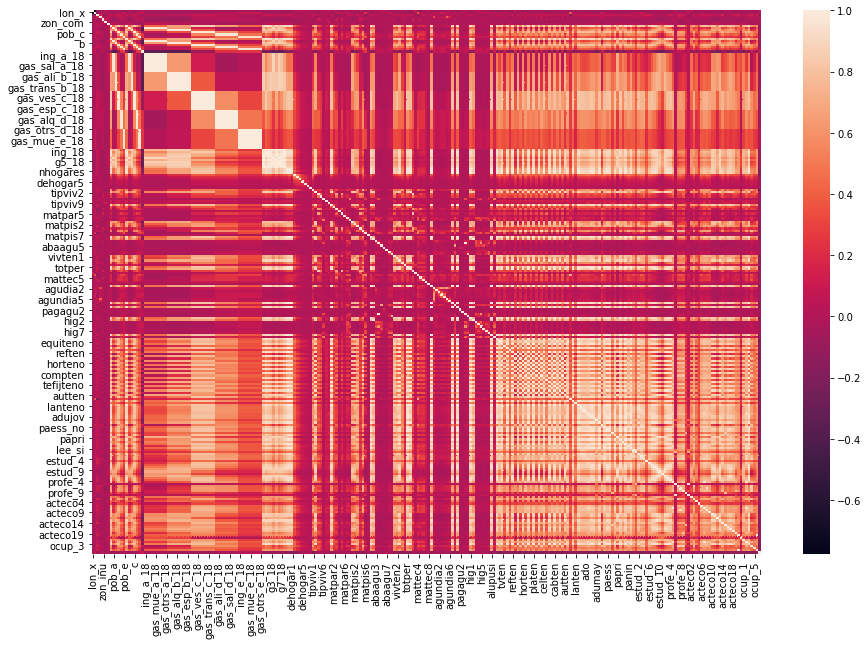

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.heatmap(censo_train.corr())

In [31]:
#Función para obtener variables con alta correlación
def get_correlated(data, cut=0.85):
    correlated_features = set()
    correlation_matrix = data.corr()
    
    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > cut:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
            
    return correlated_features
print(censo_train.shape)
correlated = get_correlated(censo_train,cut=0.9)
censo_train = censo_train.drop(columns=correlated)
censo_test = censo_test.drop(columns=correlated)
print(censo_train.shape)

(153139, 255)
(153139, 116)


In [45]:
censo_train

,lon_x,lat_y,zon_sis,zon_der,zon_inu,zon_com,score,pob,pob_a,pob_b,...,acteco14,acteco15,acteco18,acteco19,acteco20,acteco21,ocup_1,ocup_4,ocup_5,flag_censo
key_value,,,,,,,,,,,,,,,,,,,,,
106695,1.827118,-0.711359,-0.931515,-0.242328,-0.32701,-0.280674,-0.714361,-0.544996,-0.312923,-0.425825,...,-0.155999,-0.232125,-0.543045,-0.583661,-0.644919,-0.11823,-0.639720,-0.623164,-0.605414,0
271120,-0.480514,0.198531,0.054361,-0.242328,-0.32701,-0.280674,-0.104283,-0.060420,-0.312923,-0.485131,...,-0.658023,-0.007670,-0.162191,-0.215123,-0.199299,-0.11823,-0.234777,0.032167,0.062284,0
63080,-0.192205,-0.216570,1.040236,-0.242328,-0.32701,-0.280674,-0.124272,0.607510,-0.312923,1.092421,...,0.513367,-0.232125,1.742079,0.521952,0.246320,-0.11823,0.035186,-0.131666,1.063831,0
107681,-0.803171,0.748640,1.040236,-0.242328,-0.32701,-0.280674,-0.540244,-0.658501,-0.131975,-0.437686,...,-0.658023,-0.456580,-0.543045,-0.215123,-0.644919,-0.11823,-0.369758,-0.705080,-0.605414,0
107336,1.983624,-1.649749,-0.931515,-0.242328,-0.32701,-0.280674,-0.104283,-0.470782,0.669365,0.048627,...,-0.658023,-0.232125,-0.162191,-0.583661,-0.199299,-0.11823,-0.099795,-0.786996,-0.605414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19407,-1.618706,2.015743,-0.931515,-0.242328,-0.32701,-0.280674,-0.104283,0.843250,-0.054426,0.024905,...,1.350074,-0.119897,0.599517,-0.030854,-0.644919,-0.11823,1.519979,0.195999,0.062284,0
262596,-0.141929,-0.234781,0.054361,-0.242328,-0.32701,-0.280674,-0.389092,-0.702156,-0.131975,-0.259766,...,-0.490681,-0.456580,0.218663,-0.399392,0.246320,-0.11823,-0.234777,-0.786996,-0.605414,0
326334,-0.195537,-0.218557,0.054361,-0.242328,-0.32701,-0.280674,-0.104283,1.598491,-0.312923,2.753002,...,1.015391,2.573562,0.980371,1.811835,0.691940,-0.11823,-0.099795,0.277915,0.729982,0


In [40]:
censo_train.to_csv('../data/intermediate/censo_train.csv')
censo_test.to_csv('../data/intermediate/censo_test.csv')